In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [35]:
df=pd.read_csv("dati/activities_r01.csv", delimiter=",", decimal=",")

In [36]:
df.columns

Index(['Tipo di attività', 'Data', 'Preferita', 'Titolo', 'Distanza',
       'Calorie', 'Tempo', 'FC Media', 'FC max', 'TE attività aerobica',
       'Cadenza di corsa media', 'Cadenza di corsa max', 'Passo medio',
       'Passo migliore', 'Ascesa totale', 'Discesa totale',
       'Lunghezza media passo', 'Rapporto verticale medio',
       'Oscillazione verticale media', 'Tempo medio di contatto con il suolo',
       'Training Stress Score®', 'Potenza media', 'Potenza max', 'Grit',
       'Flow', 'Swolf medio', 'Frequenza media vogate', 'Ripetizioni totali',
       'Tempo di immersione', 'Temperatura min', 'Intervallo di superficie',
       'Decompressione', 'Tempo Lap migliore', 'Numero di Lap',
       'Temperatura max', 'Frequenza respiratoria media',
       'Frequenza respiratoria minima', 'Frequenza respiratoria massima',
       'Variazione stress', 'Stress iniziale', 'Stress finale', 'Stress medio',
       'Stress max', 'Tempo in movimento', 'Tempo trascorso', 'Quota minima',
    

In [37]:
#Date
df["Data"]=pd.to_datetime(df["Data"])

#Tempo
df["Tempo"]=pd.to_datetime(df["Tempo"],format='%H:%M:%S', errors="coerce")
df["Tempo"]=pd.to_timedelta(df["Tempo"].dt.strftime("%H:%M:%S"))

df["Tempo in movimento"]=pd.to_datetime(df["Tempo in movimento"],format='%H:%M:%S', errors="coerce")
df["Tempo in movimento"]=pd.to_timedelta(df["Tempo in movimento"].dt.strftime("%H:%M:%S"))

df["Tempo trascorso"]=pd.to_datetime(df["Tempo trascorso"],format='%H:%M:%S', errors="coerce")
df["Tempo trascorso"]=pd.to_timedelta(df["Tempo trascorso"].dt.strftime("%H:%M:%S"))

#Minuti e secondi
df["Passo medio"]=pd.to_datetime(df["Passo medio"],format='%M:%S', errors="coerce")
df["Passo medio"]=pd.to_timedelta(df["Passo medio"].dt.strftime("%H:%M:%S"))

df["Passo migliore"]=pd.to_datetime(df["Passo migliore"],format='%M:%S', errors="coerce")
df["Passo migliore"]=pd.to_timedelta(df["Passo migliore"].dt.strftime("%H:%M:%S"))

df["Tempo Lap migliore"]=pd.to_datetime(df["Tempo Lap migliore"],format='%M:%S', errors="coerce")
df["Tempo Lap migliore"]=pd.to_timedelta(df["Tempo Lap migliore"].dt.strftime("%H:%M:%S"))

In [38]:
dfNew=df[(df['Tipo di attività']=="Corsa")&(df['TE attività aerobica']>0)&(df['Distanza']>2)]
dfNew=dfNew.drop(columns=['Preferita', 'Ascesa totale', 'Discesa totale',
       'Lunghezza media passo', 'Rapporto verticale medio',
       'Oscillazione verticale media', 'Tempo medio di contatto con il suolo',
       'Training Stress Score®', 'Potenza media', 'Potenza max', 'Grit',
       'Flow', 'Swolf medio', 'Frequenza media vogate', 'Ripetizioni totali',
       'Tempo di immersione', 'Temperatura min', 'Intervallo di superficie',
       'Decompressione',
       'Temperatura max', 'Frequenza respiratoria media',
       'Frequenza respiratoria minima', 'Frequenza respiratoria massima','Quota minima',
       'Quota massima','Variazione stress', 'Stress iniziale', 'Stress finale', 'Stress medio',
       'Stress max'])

In [39]:
dfNew=dfNew.astype({"Calorie":int})

In [40]:
dfNew["Qta"]=1

In [41]:
dfNew.columns

Index(['Tipo di attività', 'Data', 'Titolo', 'Distanza', 'Calorie', 'Tempo',
       'FC Media', 'FC max', 'TE attività aerobica', 'Cadenza di corsa media',
       'Cadenza di corsa max', 'Passo medio', 'Passo migliore',
       'Tempo Lap migliore', 'Numero di Lap', 'Tempo in movimento',
       'Tempo trascorso', 'Qta'],
      dtype='object')

In [42]:
dfNew.dtypes

Tipo di attività                   object
Data                       datetime64[ns]
Titolo                             object
Distanza                          float64
Calorie                             int32
Tempo                     timedelta64[ns]
FC Media                            int64
FC max                              int64
TE attività aerobica              float64
Cadenza di corsa media            float64
Cadenza di corsa max              float64
Passo medio               timedelta64[ns]
Passo migliore            timedelta64[ns]
Tempo Lap migliore        timedelta64[ns]
Numero di Lap                       int64
Tempo in movimento        timedelta64[ns]
Tempo trascorso           timedelta64[ns]
Qta                                 int64
dtype: object

# Scatter plot

In [43]:
dfNew.head()

,Tipo di attività,Data,Titolo,Distanza,Calorie,Tempo,FC Media,FC max,TE attività aerobica,Cadenza di corsa media,Cadenza di corsa max,Passo medio,Passo migliore,Tempo Lap migliore,Numero di Lap,Tempo in movimento,Tempo trascorso,Qta
0,Corsa,2023-09-15 16:58:14,Olgiate Olona Corsa,5.51,412,0 days 00:34:30,156,169,3.6,166.0,175.0,0 days 00:06:16,0 days 00:05:31,NaT,6,0 days 00:34:30,0 days 00:34:30,1
1,Corsa,2023-09-12 18:21:59,Olgiate Olona Corsa,5.09,387,0 days 00:33:28,155,184,3.4,163.0,204.0,0 days 00:06:34,0 days 00:04:02,NaT,6,0 days 00:33:26,0 days 00:33:28,1
2,Corsa,2023-09-11 12:36:31,Olgiate Olona Corsa,5.07,391,0 days 00:34:52,154,168,3.5,163.0,173.0,0 days 00:06:52,0 days 00:06:24,NaT,6,0 days 00:34:51,0 days 00:34:52,1
3,Corsa,2023-09-09 10:02:38,Olgiate Olona - 15' risc + 8x60'' (@175-185 bpm),5.56,420,0 days 00:35:18,156,178,4.0,164.0,187.0,0 days 00:06:21,0 days 00:04:29,NaT,20,0 days 00:35:17,0 days 00:35:18,1
4,Corsa,2023-09-06 12:35:23,Olgiate Olona Corsa,5.21,397,0 days 00:32:16,162,179,4.0,165.0,177.0,0 days 00:06:12,0 days 00:05:23,NaT,6,0 days 00:32:15,0 days 00:32:16,1


In [44]:
distanze=list(dfNew["Distanza"])
qta=list(dfNew["Qta"])


# Statistiche di base

In [45]:
print("Distanza totale in Km", dfNew["Distanza"].sum())
print("Numero di corse totali", dfNew["Qta"].sum())
print("Tempo totale attività", dfNew["Tempo"].sum())
print("Frequenza cardiaca media", dfNew["FC Media"].mean())
print("Totale calorie consumate", dfNew["Calorie"].sum())

Distanza totale in Km 739.34
Numero di corse totali 135
Tempo totale attività 3 days 13:32:27
Frequenza cardiaca media 152.6962962962963
Totale calorie consumate 56922


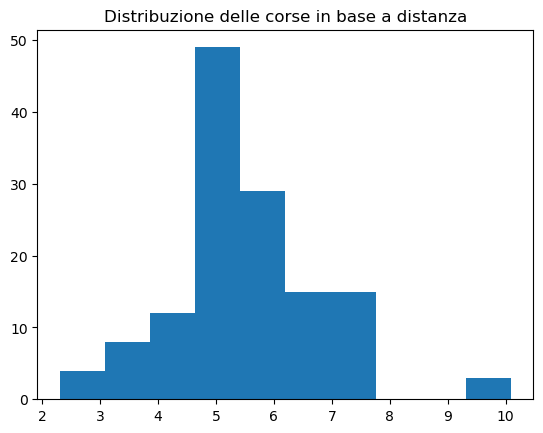

In [46]:
fig, ax=plt.subplots()
ax.hist(distanze)
plt.title("Distribuzione delle corse in base a distanza")
fig.savefig("dati/hist1.jpg")
plt.show()

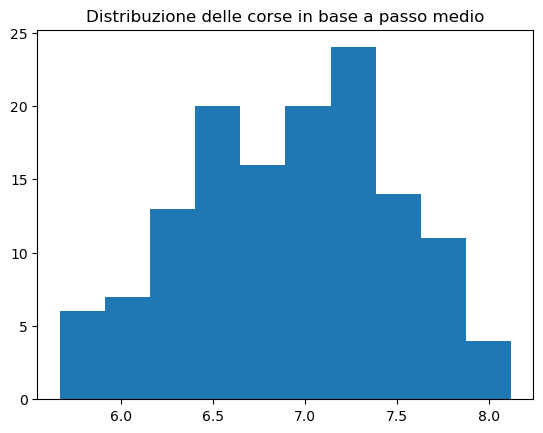

In [47]:
fig, ax=plt.subplots()
ax.hist(dfNew["Passo medio"].dt.total_seconds()/60)
plt.title("Distribuzione delle corse in base a passo medio")
fig.savefig("dati/hist2.jpg")
plt.show()

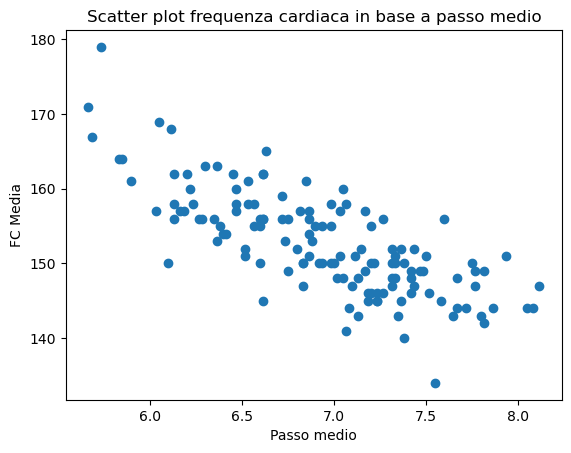

In [48]:
fig, ax=plt.subplots()
ax.scatter(dfNew['Passo medio'].dt.total_seconds()/60, dfNew['FC Media'])
ax.set_xlabel("Passo medio")
ax.set_ylabel("FC Media")
plt.title("Scatter plot frequenza cardiaca in base a passo medio")
fig.savefig("dati/scatter1.jpg")
plt.show()


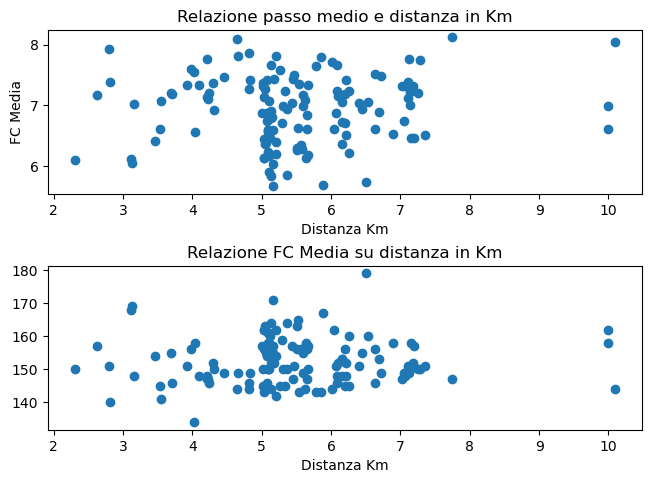

In [49]:
fig, (ax1,ax2)=plt.subplots(2,1,layout="constrained")
fig.suptitle(None)
ax1.scatter(dfNew['Distanza'],dfNew['Passo medio'].dt.total_seconds()/60)
ax1.set_title("Relazione passo medio e distanza in Km")
ax1.set_xlabel("Distanza Km")
ax1.set_ylabel("Passo medio")


ax2.scatter(dfNew["Distanza"],dfNew['FC Media'])
ax2.set_title("Relazione FC Media su distanza in Km")
ax2.set_xlabel("Distanza Km")
ax1.set_ylabel("FC Media")
fig.savefig("dati/scatter2.jpg")
plt.show()

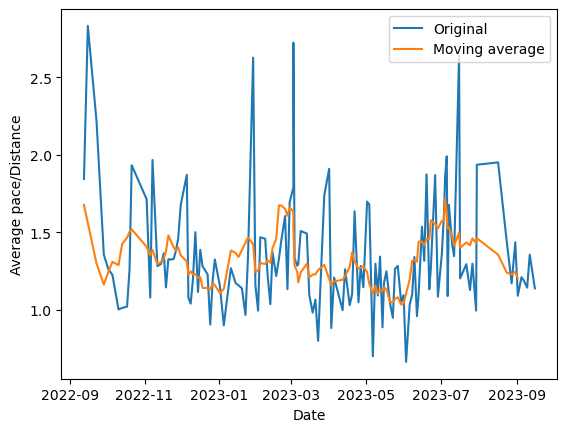

In [68]:
spec_var=dfNew['Passo medio'].dt.total_seconds()/60/dfNew["Distanza"]
moving_av=spec_var.rolling(window=7).mean()

fig, ax=plt.subplots()
ax.plot(dfNew["Data"],spec_var, label="Original")
ax.plot(dfNew["Data"], moving_av, label="Moving average")
ax.set_xlabel("Date")
ax.set_ylabel("Average pace/Distance")
plt.legend(loc="upper right")
fig.savefig("movingav.jpg")
plt.show()

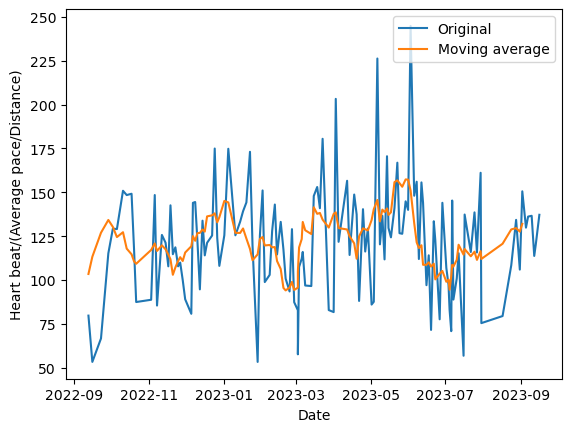

In [75]:
spec_var2=dfNew["FC Media"]/(dfNew['Passo medio'].dt.total_seconds()/60/dfNew["Distanza"])
moving_av2=spec_var2.rolling(window=7).mean()

fig, ax=plt.subplots()
ax.plot(dfNew["Data"],spec_var2, label="Original")
ax.plot(dfNew["Data"], moving_av2, label="Moving average")
ax.set_xlabel("Date")
ax.set_ylabel("Heart beat/(Average pace/Distance)")
plt.legend(loc="upper right")
fig.savefig("dati/movingav2.jpg")
plt.show()